<a href="https://colab.research.google.com/github/KIHONG-KIM/Kaggle/blob/main/%5BKaggle%5D_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# 주요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.0)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 데이터 셋 확인
df_train = pd.read_csv('train.csv')   # pandas 모듈을 사용, red_csv()함수를 통해 csv파일을 읽어와 df_train에 할당
df_test = pd.read_csv('test.csv')     # pandas 모듈을 사용, red_csv()함수를 통해 csv파일을 읽어와 df_train에 할당

df_train.head()                       # 읽어온 파일의 윗부분 head 5행을 읽어오기
                                      # 각 데이터가 무엇을 의미하는지 알아야 함.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.tail()                       # 읽어온 파일의 아랫부분 tail 5행을 읽어오기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df_train.describe()                   # describe()는 누락된 데이터(NaN)은 제외하고 데이터 요약이 진행. # std 뜻: standard deviation 표준편차라는 뜻

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 1 Null data check
df_train.columns # 컬럼 속성 확인

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

# 문자열 정렬하기 {:>10} 의미 : 10문자를 오른쪽 정렬하고싶다.

print()

for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NAN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

print(df_train[col].shape[0])

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%

column: PassengerId	 Percent of NAN value: 0.00%
column:     Pclass	 Percent of NAN value: 0.00%
column:       Name	 Percent of NAN value: 0.00%
column:        Sex	 Percent of NAN value: 0.00%
column:        Age	 Percent of NAN value: 20.57%
column:      SibSp	 Percent of NAN value: 0.00%
column:      Parch	 Percent of NAN value: 0.00%
column:     Ticket	 Percent of NAN value: 0.00%
column:       Fare	 Percent of NAN

<Axes: >

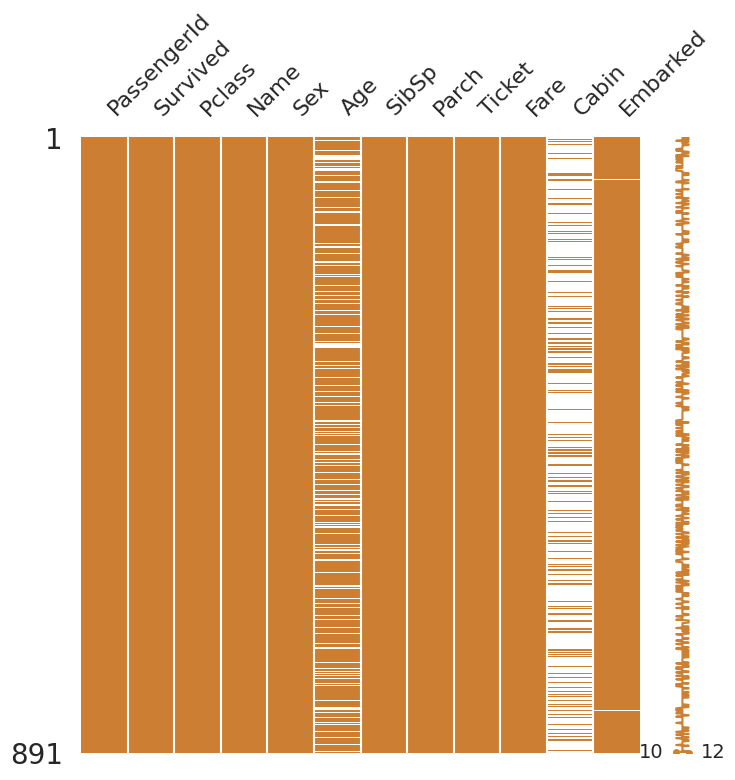

In [ ]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
# train 데이터의 Null data의 분포를 시각화

<Axes: >

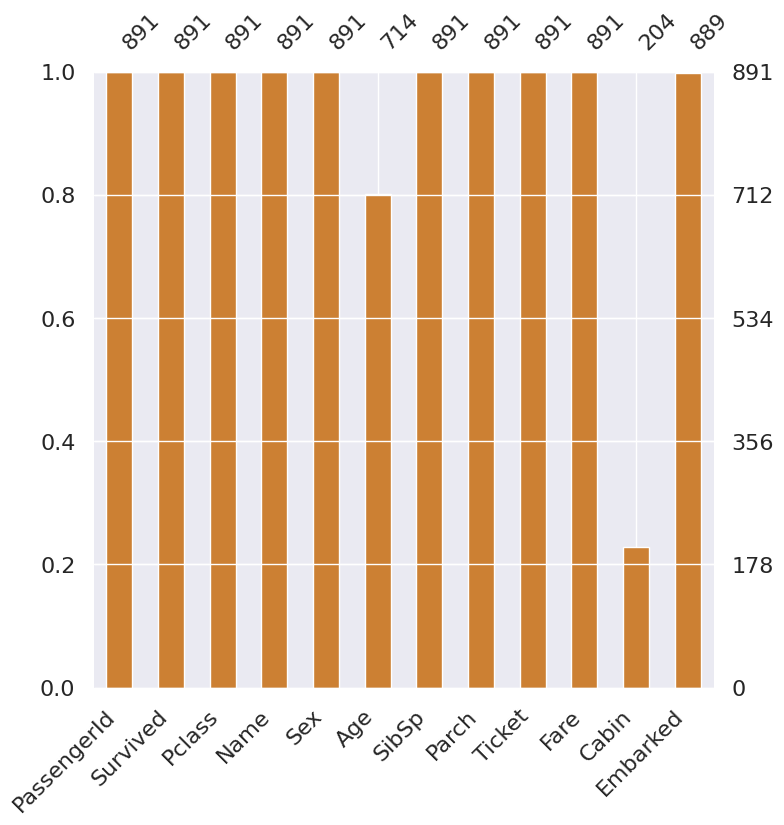

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
# train 데이터의 Null data의 비율을 bar차트로 시각화

<Axes: >

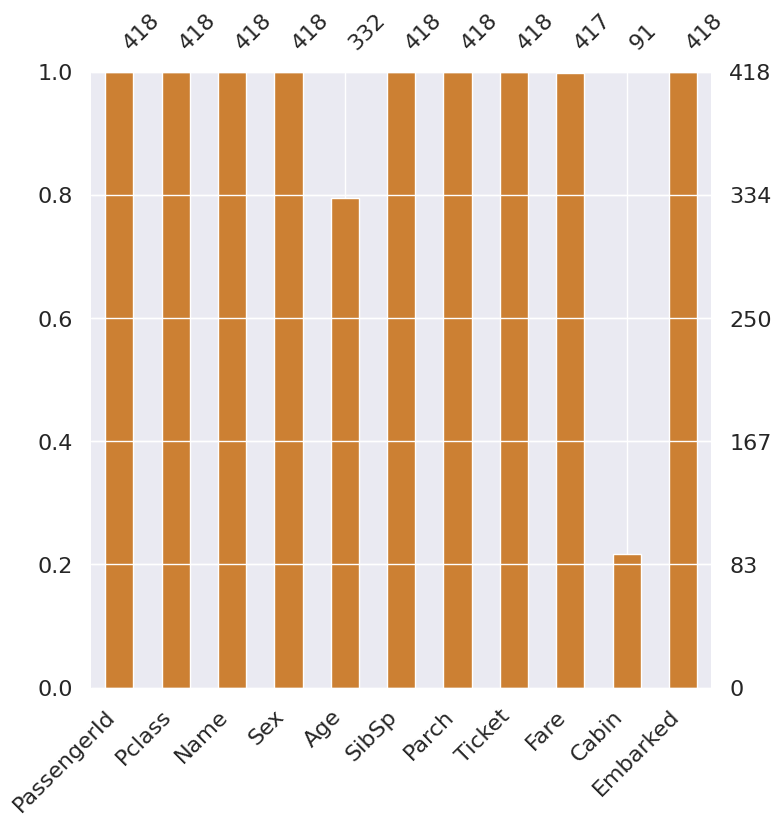

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
# 테스트 데이터의 Null data의 비율을 bar차트로 시각화

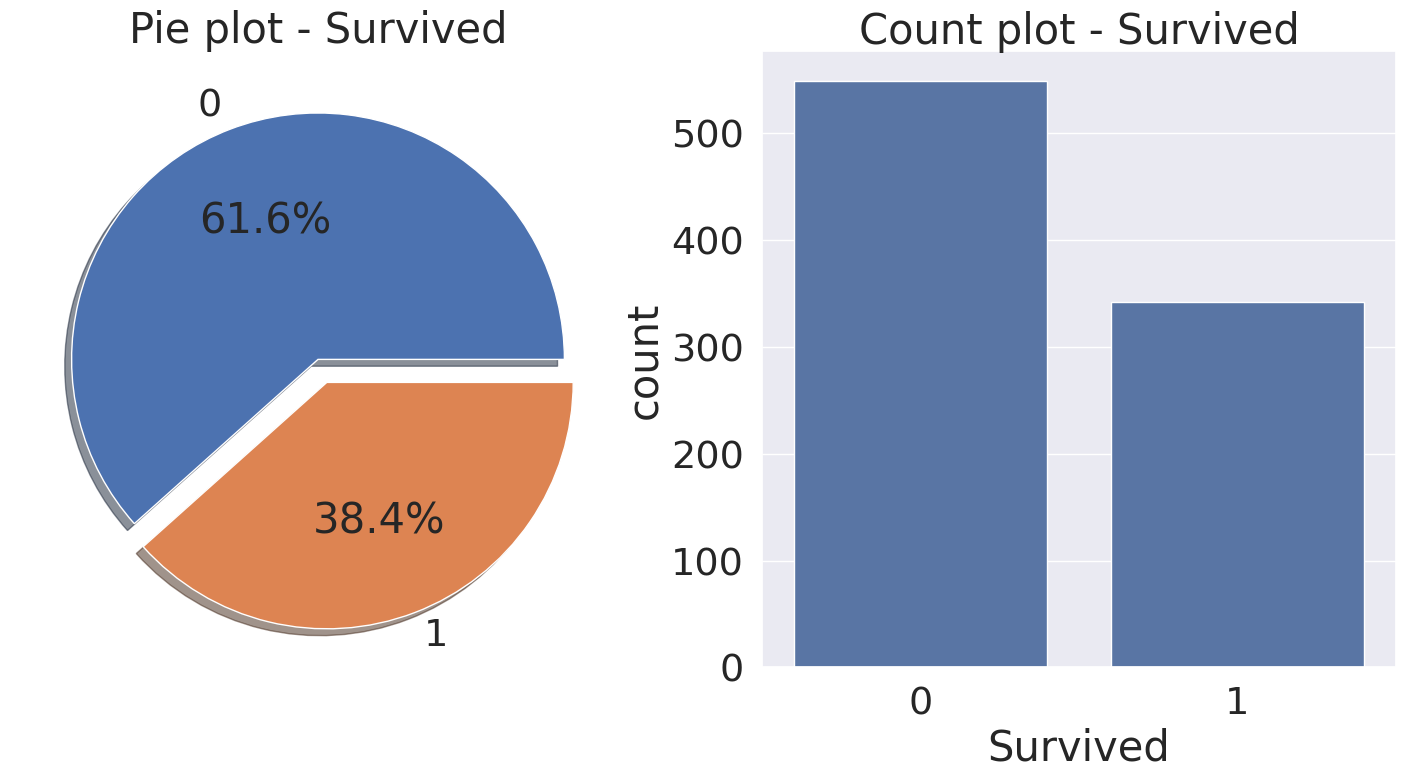

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# plt.subplots(1, 2): 1행 2열의 서브플롯 그리드를 생성합니다. 즉, 2개의 그래프가 나란히 배치됩니다.
# figsize=(18, 8): 그래프 영역의 크기를 설정합니다. 이 경우 너비가 18인치, 높이가 8인치의 그래프가 생성됩니다.
# f: 생성된 Figure 객체를 저장하는 변수입니다. Figure 객체는 전체 그래프를 포함하는 컨테이너 역할을 합니다.
# ax: 생성된 Axes 객체들을 저장하는 리스트입니다. Axes 객체는 각 서브플롯에 해당하며, 그래프를 그리는 데 사용됩니다.

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# 데이터의['Survived']열 선택.각 값마다 총합으로 그룹화.plot모듈.pie차트선택(explode - 살짝 떨어트리는 효과[0, 0.1만큼], autopct='%1.1f%%' )
# explode explode=[0, 0.1]은 파이 차트에서 특정 슬라이스를 다른 슬라이스보다 더 튀어나오게 만드는 데 사용되는 매개 변수입니다.
# autopct='%1.1f%%'는 파이 차트에서 각 슬라이스의 백분율을 자동으로 표시하는 데 사용되는 서식 문자열입니다.

ax[0].set_title('Pie plot - Survived')          # X축 이름 넣기
ax[0].set_ylabel('')                            # y축 라벨 없애기

sns.countplot(x='Survived', data=df_train, ax=ax[1])
# seaborn style을 사용한 countplot차트에서 x축은 'Survived'라는 열의 데이터를 사용하고, data=df_train 사용, 0,1번 중 1번에 차트를 그리겠다.
ax[1].set_title('Count plot - Survived')        # X축 이름 넣기

plt.show()

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# ~style 이 부분은 pandas 라이브러리의 crosstab 함수를 사용하여 연관성 표(contingency table)를 생성합니다.
# df_train['Pclass']와, df_train['Survived']열을 사용합니다.
# df_train['Pclass']: 이는 df_train이라는 이름의 Pandas DataFrame에 있는 "Pclass"라는 열을 나타냅니다. 이 열은 승객들의 객실 등급(예: 1등석, 2등석, 3등석)을 나타내는 데이터를 포함할 가능성이 높습니다.
# df_train['Survived']: 이는 같은 DataFrame df_train에 있는 또 다른 열 "Survived"를 참조합니다. 이 열은 승객이 생존했는지 여부(예: 생존하면 1, 사망하면 0)에 대한 정보를 포함할 가능성이 높습니다.
# margins=True: 이 인수는 crosstab 함수에 행과 열 모두에 대한 여백 합계(marginal totals)를 포함하도록 지시합니다. 이러한 여백 합계는 데이터의 전체 분포에 대한 추가 정보를 제공합니다.
# style~ 이 부분은 Pandas DataFrame의 스타일링 기능을 호출하여 표의 셀에 스타일을 적용합니다.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

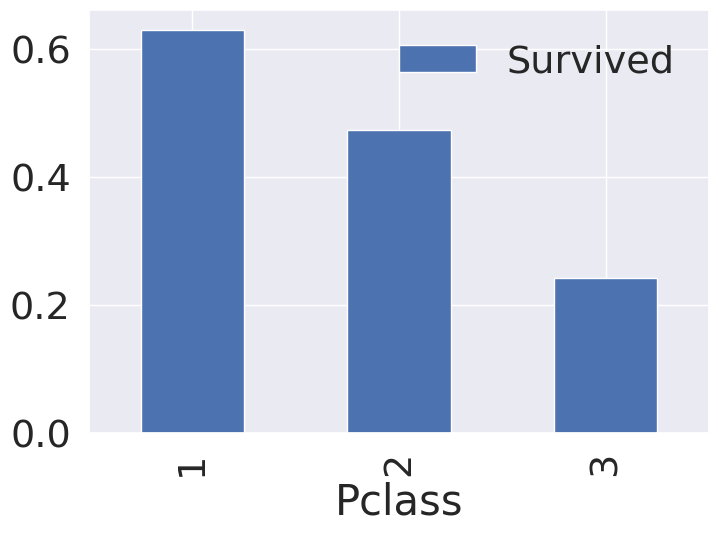

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

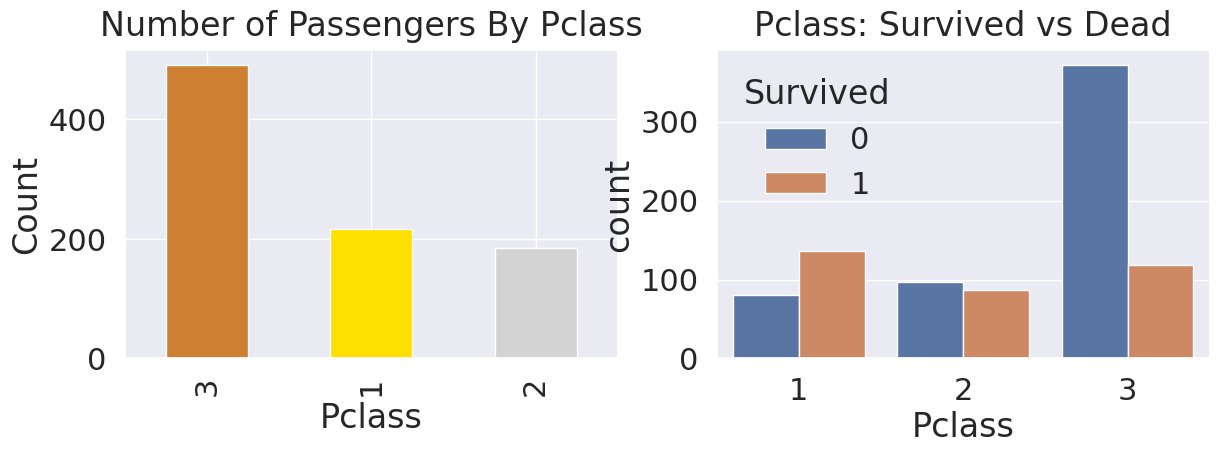

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(14, 4))
bars = df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

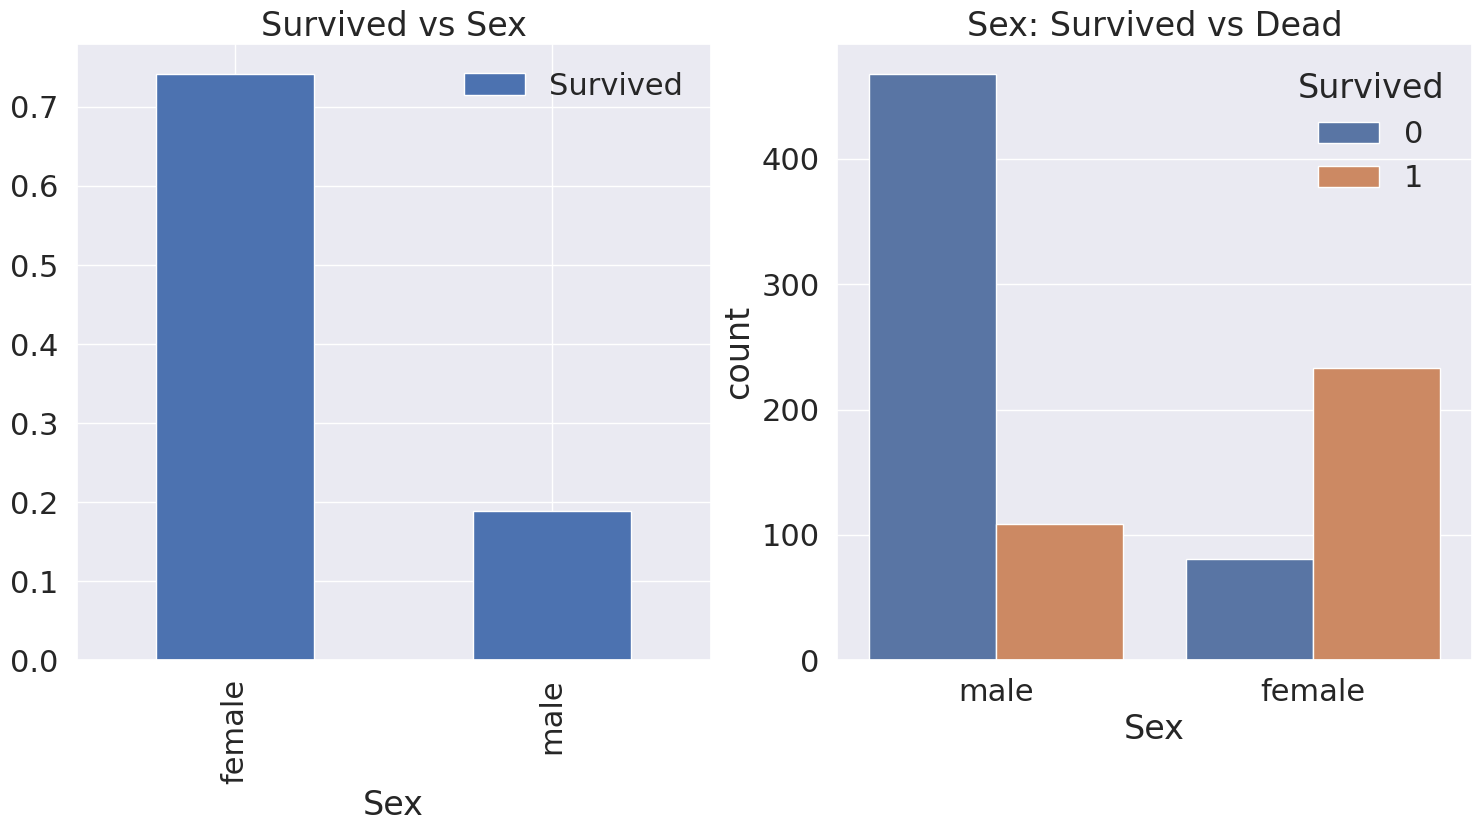

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


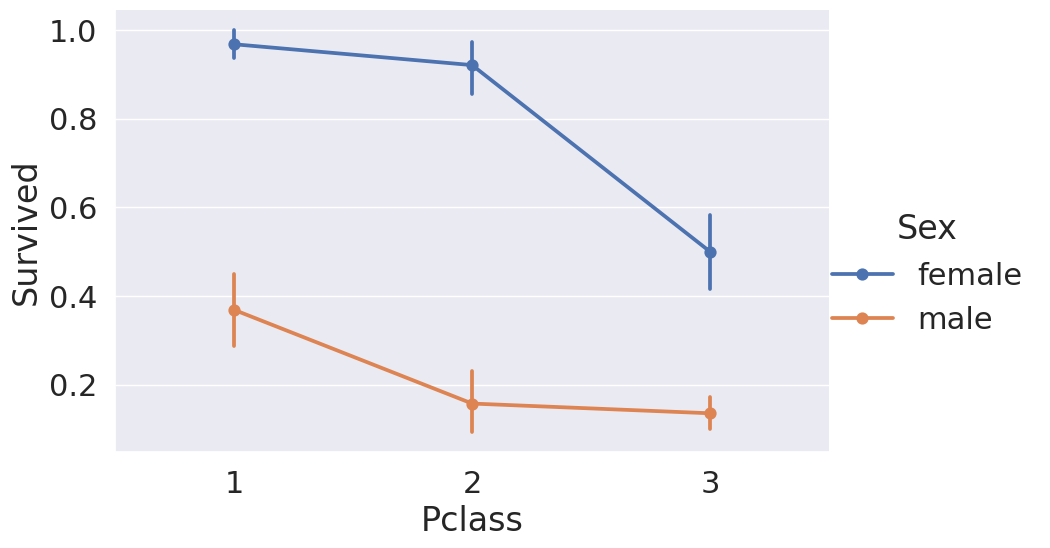

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind ='point', height=6, aspect=1.5)
# 캐글 필사코드는 sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5) 이거였지만,
# 2023년에 이름이 factorplot에서 catplot으로 바뀌었다는 것을 알 수 있었다.
# size를 입력하면 이런 에러가 난다. AttributeError: Line2D.set() got an unexpected keyword argument 'size'
# seaborn.catplot API를 찾아본 결과 size는 height로 바뀌었다. size라는 표현이 모호하며, height가 더 적절한 설명이라 변경된 것 처럼 보인다.

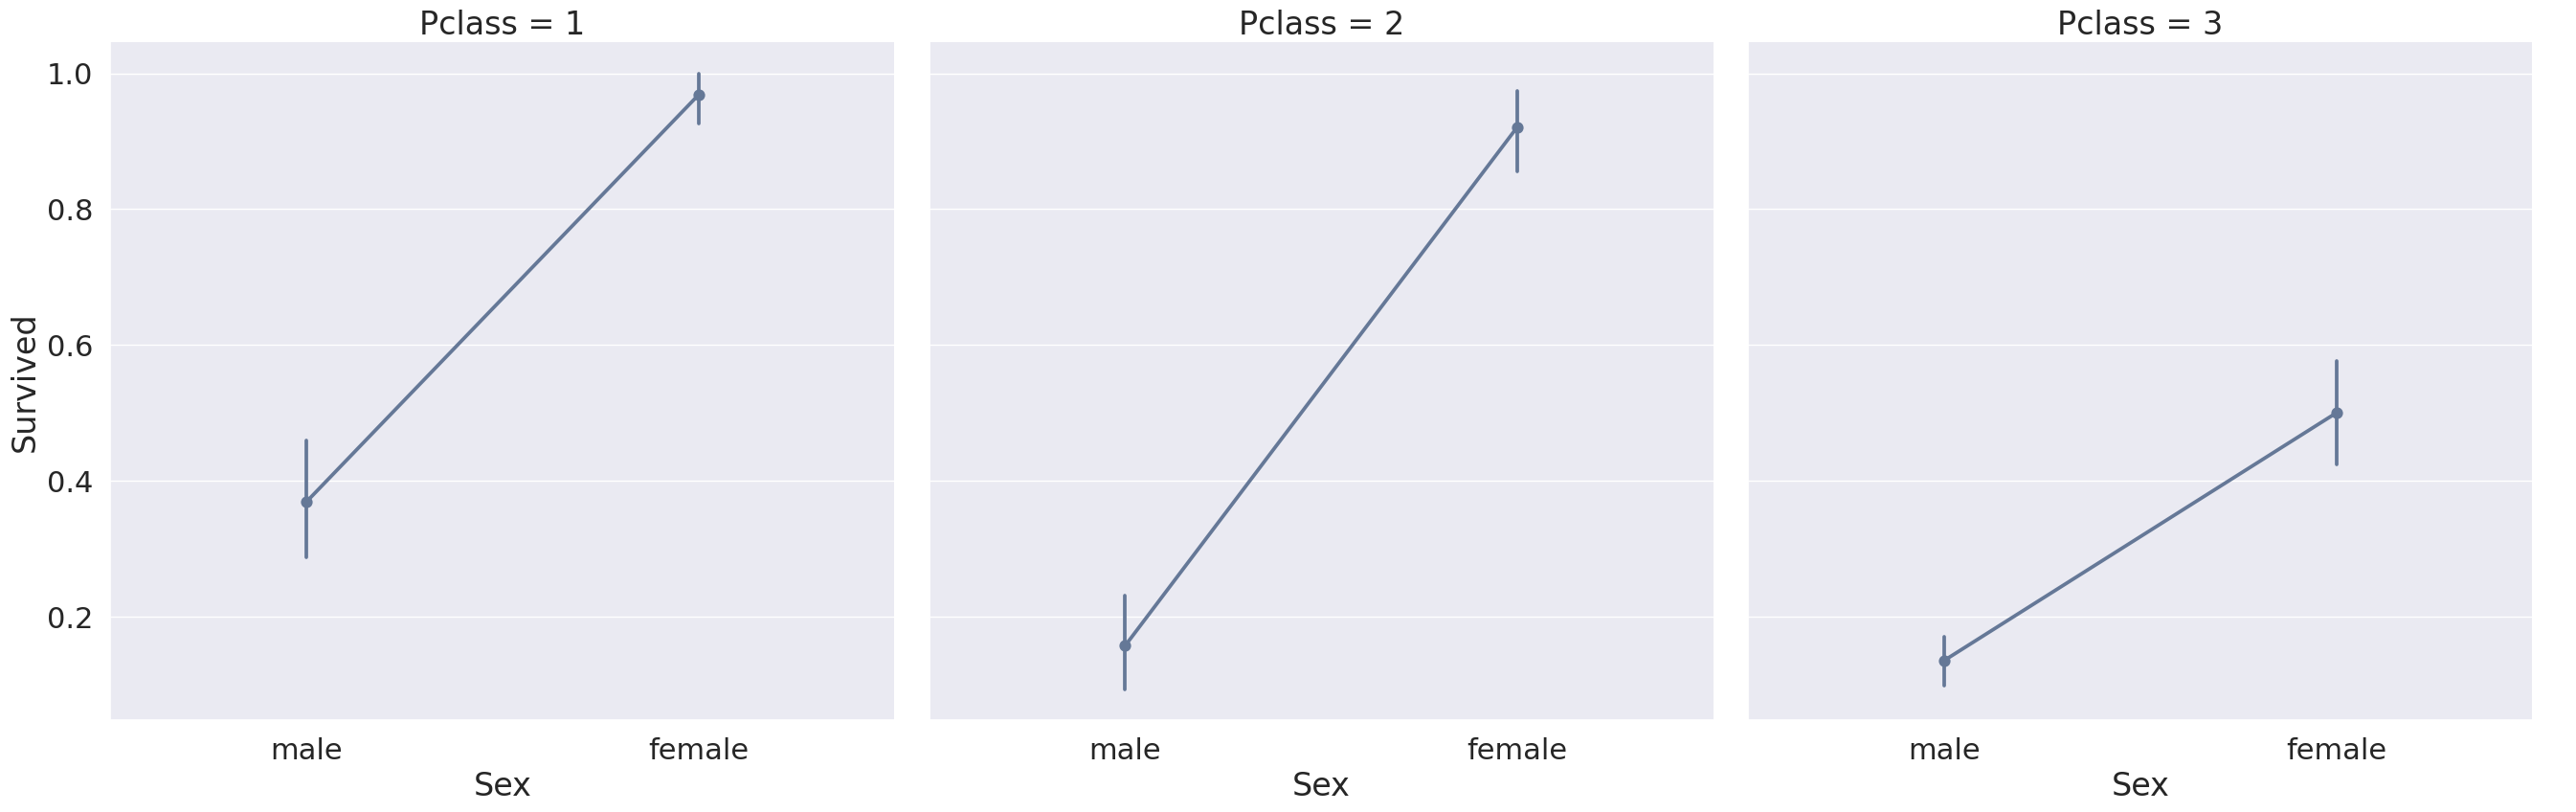

In [ ]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation= 0.5, kind='point', height=9, aspect=1)

In [ ]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 나이 어린 탑승객: 0.4 Years
탑승객 평균 나이 : 29.7 Years


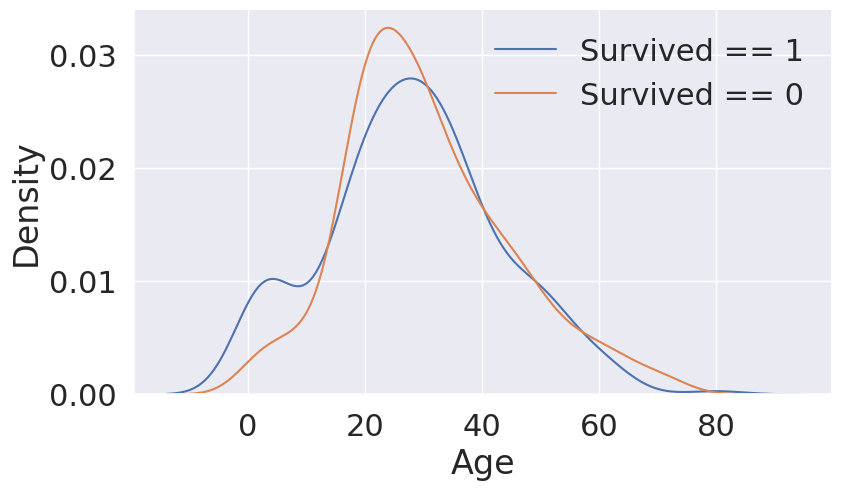

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']== 1]['Age'], ax=ax)   # df_train['Survived'] == 1인 ['Age'] 열을 선택하여 축에 추가한다.
sns.kdeplot(df_train[df_train['Survived']== 0]['Age'], ax=ax)   # df_train['Survived'] == 0인 ['Age'] 열을 선택하여 축에 추가한다.

# 설명
# seaborn의 kedplot을 사용합니다. ※kedplot = 커널 밀집도 추정 플롯(kernel density estimation plot)
# 이 코드는 두 개의 커널 밀집도 추정 선을 사용하여 타이타닉 생존 데이터에서
# 생존 여부에 따른 나이 분포를 비교하는 시각화를 생성합니다.
# 이를 통해 생존 여부와 연령 사이에 어떤 연관성이 있는지 확인할 수 있습니다.
# => 생존자 중 나이가 어린 경우가 많음을 볼 수 있음

plt.legend(['Survived == 1', 'Survived == 0']) #
plt.show()


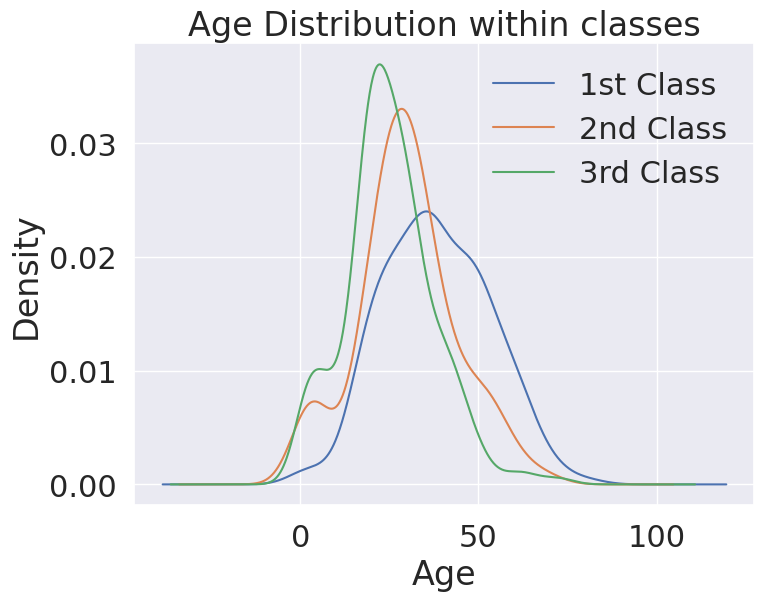

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# Class 가 높을 수록 나이 많은 사람의 비중 ↑

Text(0.5, 1.02, 'Survival rate change depending on range of Age')

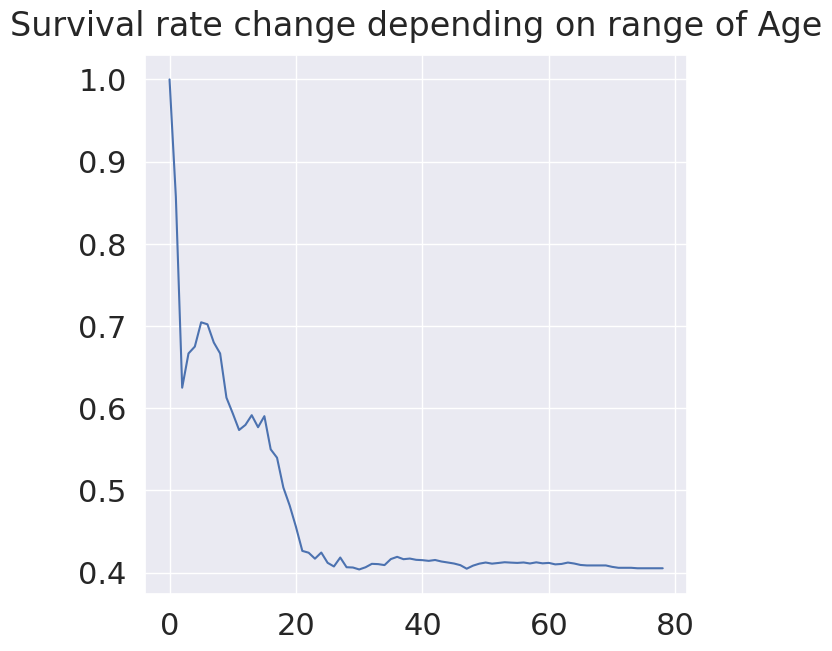

In [ ]:
# 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
# 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

cummulate_survival_ratio = []

for i in range (1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)

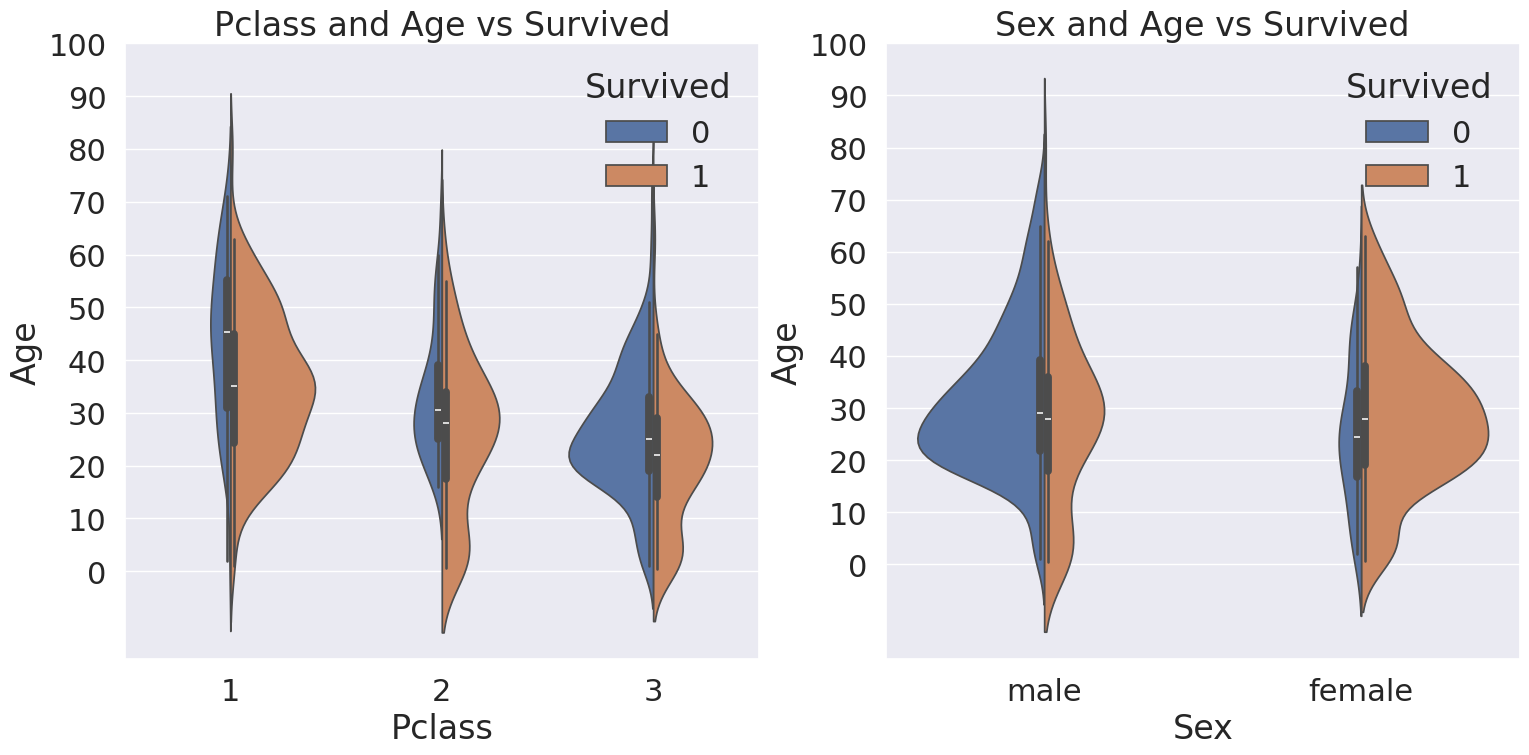

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age",hue="Survived",data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<Axes: xlabel='Embarked'>

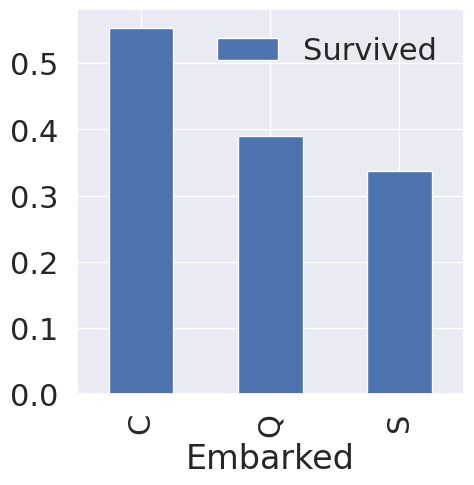

In [ ]:
f, ax = plt.subplots(1,1, figsize=(5,5))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

# 이 코드는 df_train 데이터프레임에서 두 개의 열을 선택합니다:
# Embarked: 승객이 탑승한 항구를 나타내는 열 (예: S, Q, C 등)
# Survived: 생존 여부를 나타내는 이진 변수 (1: 생존, 0: 사망)

# as_index=True: 그룹화된 결과를 새로운 데이터프레임으로 만들고, 'Embarked' 값 자체를 인덱스로 설정합니다. 이는 각 그룹의 카테고리를 명확하게 식별하는 데 도움이 됩니다.
# .mean(): 각 그룹에서 'Survived' 열의 평균값을 계산합니다. 이는 각 출신 항구별 생존률을 나타냅니다.

# 이 코드는 'Survived' 열 (생존률 평균) 기준으로 데이터프레임을 내림차순으로 정렬합니다.
# 이 정렬 덕분에 생존률이 가장 높은 출신 항구가 그래프에서 가장 먼저 나타납니다.

# 이 코드는 Matplotlib 라이브러리를 사용하여 바 그래프를 생성합니다.
# 그러나 이 코드는 작동하기 위해 ax라는 이름의 Matplotlib 축 객체가 이미 정의되어 있어야 합니다.
# 정의된 ax 객체에 이 코드를 적용하면 다음과 같은 그래프가 생성됩니다.
# x축: 각 출신 항구 (예: S, Q, C 등)
# y축: 각 출신 항구별 생존률 평균
# 높이가 더 높은 막대는 해당 출신 항구의 생존률이 더 높음을 나타냅니다.

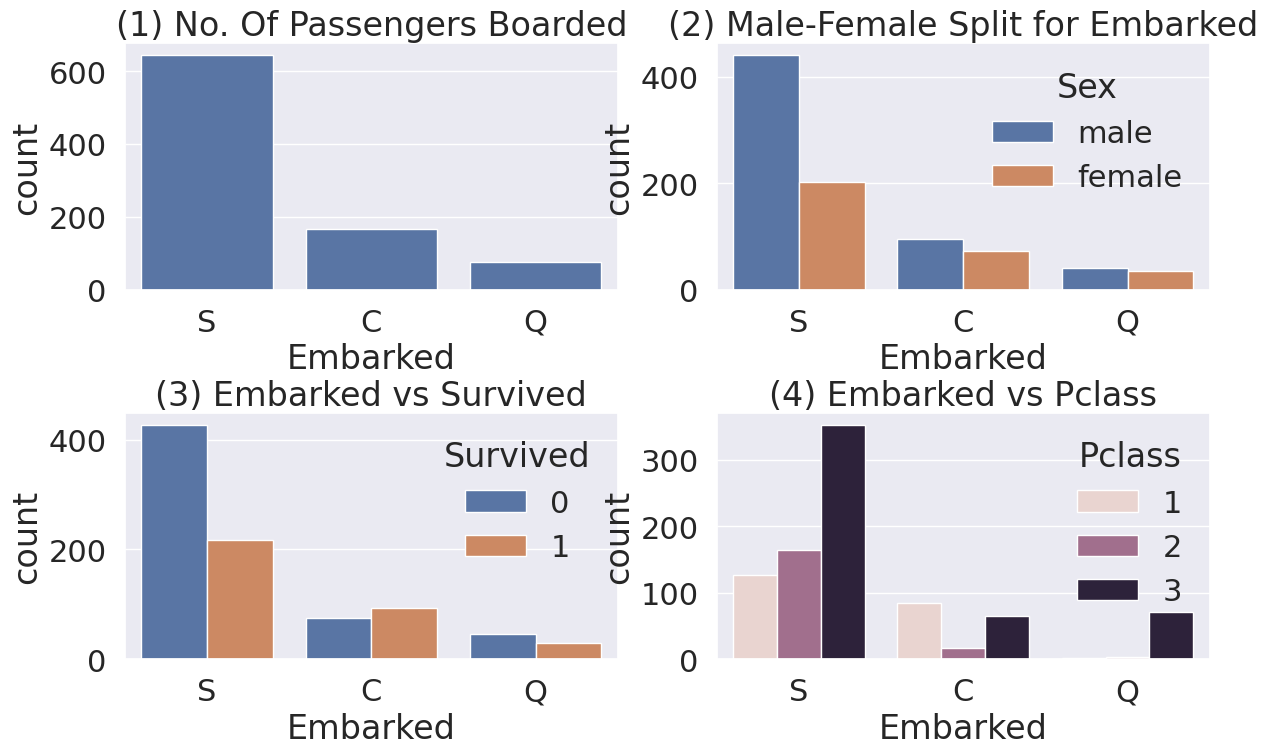

In [ ]:
f, ax = plt.subplots(2,2, figsize=(14,8))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')                          # Embarked 탑승 위치만 보기
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')                     # 성별과 탑승 위치 비교
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')                               # 탑승구와 생존자 비교
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')                                 # 탑승구와 클래스 비교
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> Family - SibSp (형제 자매) + Parch (부모자녀)

In [4]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 더해야하니 1을 더한다.

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


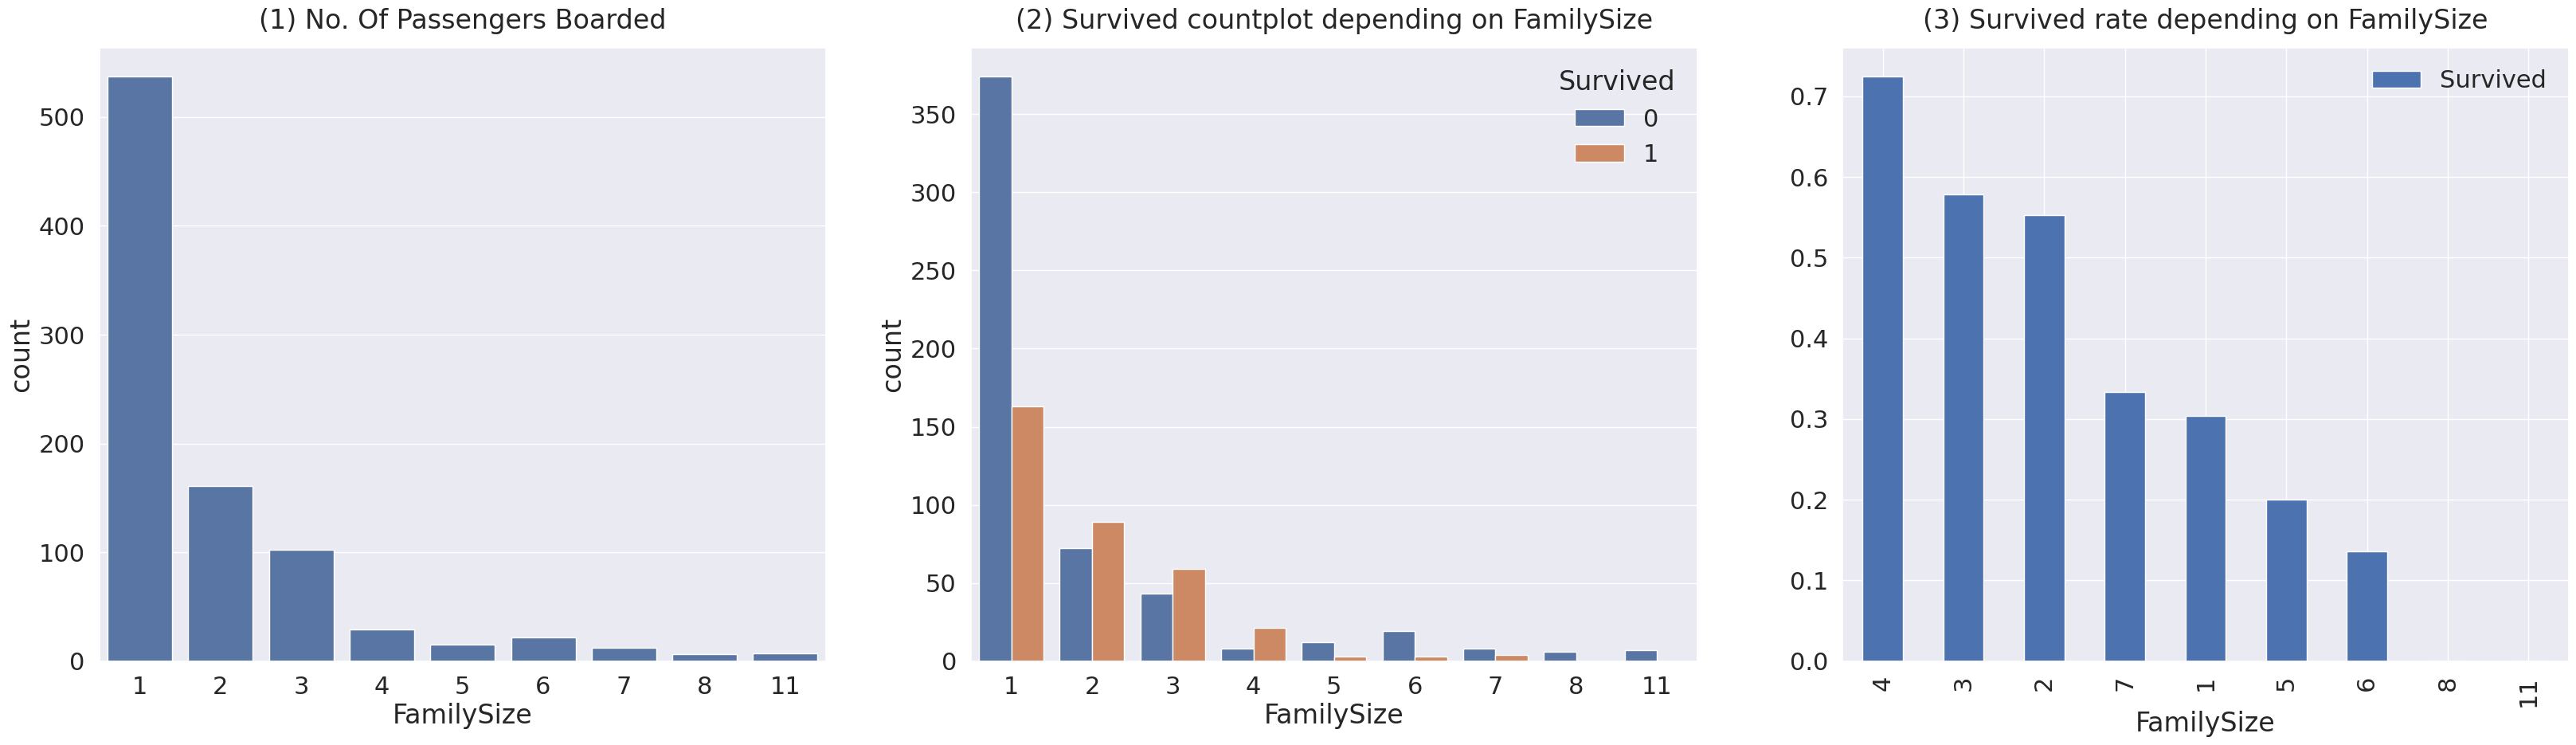

In [18]:
# 1행 3열로 서브플롯을 배치합니다. 즉, 3개의 서브플롯이 가로로 나열됩니다.
# 그림의 너비와 높이를 설정합니다. 이 경우 그림의 너비는 40인치이고 높이는 10인치입니다.
f,ax = plt.subplots(1,3, figsize=(40,10))

# y=1.02제목의 위치를 조정합니다. 기본값은 0.5이며, 값이 커질수록 위쪽으로 이동합니다.
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# hue='Survived': 색상으로 표현할 변수를 설정합니다. 이 경우 'Survived' 변수가 사용됩니다. 즉, 생존 여부에 따라 색상이 다르게 표시됩니다
sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# groupby(['FamilySize'], as_index=True).mean()
# 'FamilySize' 열을 기준으로 데이터를 그룹화합니다.
# as_index=True 옵션을 사용하여 기존 인덱스 대신 'FamilySize'를 새로운 인덱스로 설정합니다.
# 각 그룹에 대해 'Survived' 열의 평균을 계산합니다.

# .sort_values(by='Survived', ascending=False):
# 'Survived' 열의 평균값을 기준으로 데이터를 내림차순 정렬합니다. 즉, 생존율이 높은 가족 크기 순으로 정렬합니다.
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

# 서브플롯 간의 간격을 조정하는 Matplotlib 함수입니다.
# wspace=0.2: 가로 방향 간격을 설정합니다.
# 이 값은 0과 1 사이의 값을 가져야 하며, 0에 가까울수록 서브플롯 간의 간격이 좁아지고, 1에 가까울수록 간격이 넓어집니다.
# 이 경우 wspace=0.2는 서브플롯 간의 가로 간격을 기본값보다 20% 넓게 설정합니다.
# hspace=0.5: 세로 방향 간격을 설정합니다. 이 경우 hspace=0.5는 서브플롯 간의 세로 간격을 기본값보다 50% 넓게 설정합니다.
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# *Fare*

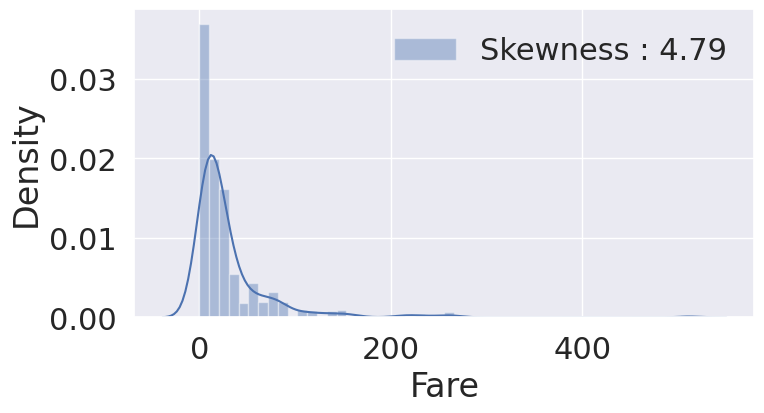

In [20]:
# 이 코드는 하나의 그림(feature)과 그림 안에 하나의 축(ax)을 만듭니다.
# figsize=(8, 4)는 그림의 너비를 8인치, 높이를 4인치로 설정합니다.
f, ax = plt.subplots(1,1, figsize=(8,4))

# sns.distplot: 이는 Seaborn 라이브러리의 distplot 함수를 호출하며, 이는 데이터의 *분포 플롯(히스토그램)*을 만드는 데 사용됩니다.
# label='Skewness : {:.2f}'.format(df_train['Fare'].skew()): 이는 플롯에 "Fare" 데이터의 왜곡도를 표시하는 레이블을 만듭니다.
# .skew(): 이는 데이터의 왜곡도를 계산합니다 (비대칭성을 측정하는 지표).
# '{:.2f}'.format(): 이는 왜곡도 값을 소수점 두 자리까지 표시하도록 형식 지정합니다.
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

# g.legend(): 이는 g 객체(분포 플롯을 포함)에서 legend 메서드를 호출하여 플롯에 범례를 만듭니다.
# loc='best': 이는 Matplotlib에게 플롯에서 가장 적절한 위치에 범례를 자동으로 배치하도록 지시합니다.
g = g.legend(loc='best')

In [29]:
# 뜬금없긴하지만, 요금을 500달러나 낸 사람이 있어서 찾아보았다.
# 전체 데이터 or 이름을 선택할 수도 있다. df_train을 두면 전체를, df_train['Name'] 이렇게하면 이름을 선택한다.
df_train[df_train['Fare'] == df_train['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


* 분포가 비대칭인 그래프가 나타났는데, 이를 **high skewness**라고 한다.

* 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 있어서, 몇개 없는 outlier(선 바깥에 있는 데이터들)에 대해 민감하게 반응한다면 실제 예측시 좋지 않은 결과가 나타날 수 있어서 (*outlier라고 부르나 봄*) fare 값에 log를 취함.

* 여기서 pandas의 유용한 기능을 사용하는데, dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 혹은 apply를 사용하면 매우 손쉽게 적용할 수 있습니다.

* 우리가 지금 원하는 것은 Fare columns의 데이터를 모두 로그값을 취하는 것인데, 파이썬의 간단한 lambda함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면 Fare columns 데이터에 그대로 적용이 됩니다. *매우 유용한 기능이니 꼭 숙지하세요!* /넵

In [38]:
# df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset에 있는 nan va Lue를 평균값으로 치환합니다.

# df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

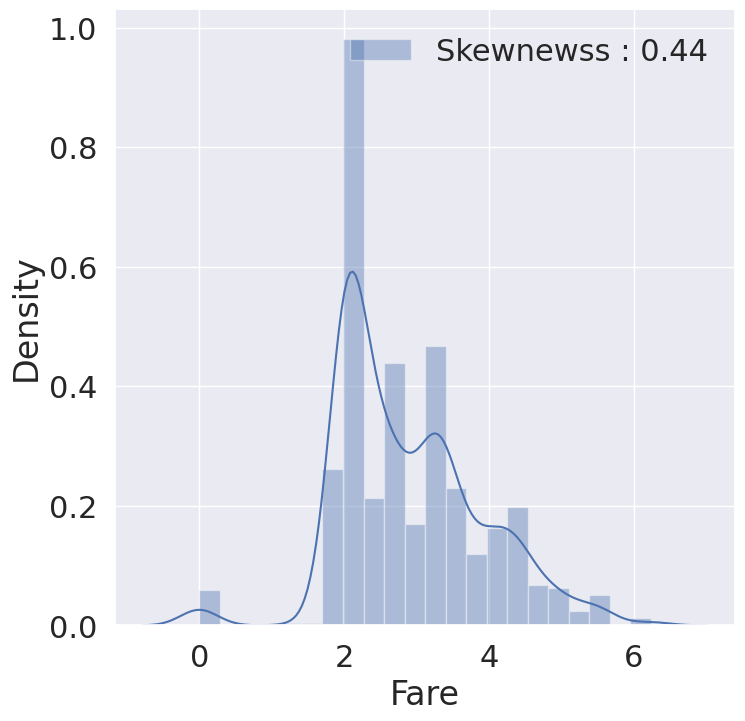

In [31]:
# 로그를 취하고 나니, 비대칭성이 많이 사라진 것을 확인할 수 있음.
# 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다. - 데이터 전 처리? 데이터 가공? 을 의미하는 것 같다.
# 사실 방금 한 것은 feature engineering에 들어가는 부분인데, 여기서 작업했습니다.

# 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 ,feature 들에 여러 조작을 하거나,
# 새로운 feature를 추가하는 것을 feature enginering이라고 하는데, 우리는 이제 그것을 살펴볼 것 입니다.

fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewnewss : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# Cabin

* 이 feature의 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.

* 그러므로 우리는 세우려는 모델에 포함시키지 않도록 하겠습니다. => 데이터 정보가 부족하기 때문에 데이터를 포함시켜 학습하면 정확도가 내려갈 것을 우려하여 포함시키지 않음.

In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Ticket

이 feature는 NaN은 없습니다. 일단 string data이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [64]:
# df_train['Ticket'].value_counts()
df_train.drop_duplicates( ['Ticket'], keep=False )  # 중복 값 제거하고 출력
df_train[df_train['Ticket'].str.contains('STON') ] # 특정 단어 추출해서 확인
df_train[df_train['Ticket'].str.contains('A.5') ] # 특정 단어 추출해서 확인
df_train[df_train['Ticket'].str.contains('CA') ] # 특정 단어 추출해서 확인
df_train[df_train['Ticket'].str.contains('PP') ] # 특정 단어 추출해서 확인
# df_train.drop_duplicates( ['Ticket'], keep=False )  # 중복 값 제거하고 출력


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.35,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.50,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.70,G6,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C
